First 5 rows of the data:
   Unnamed: 0  trial_id treatment_group_key  conversion  \
0           0         0             control           1   
1           1         0          treatment1           1   
2           2         0          treatment1           0   
3           3         0          treatment1           1   
4           4         0             control           0   

   control_conversion_prob  treatment1_conversion_prob  \
0                 0.516606                    0.572609   
1                 0.304005                    0.736460   
2                 0.134277                    0.480985   
3                 0.801968                    0.858532   
4                 0.063552                    0.060142   

   treatment1_true_effect  x1_informative  x2_informative  x3_informative  \
0                0.056002       -1.926651        1.233472       -0.475120   
1                0.432454        0.904364        0.868705       -0.285977   
2                0.346709        1.6809

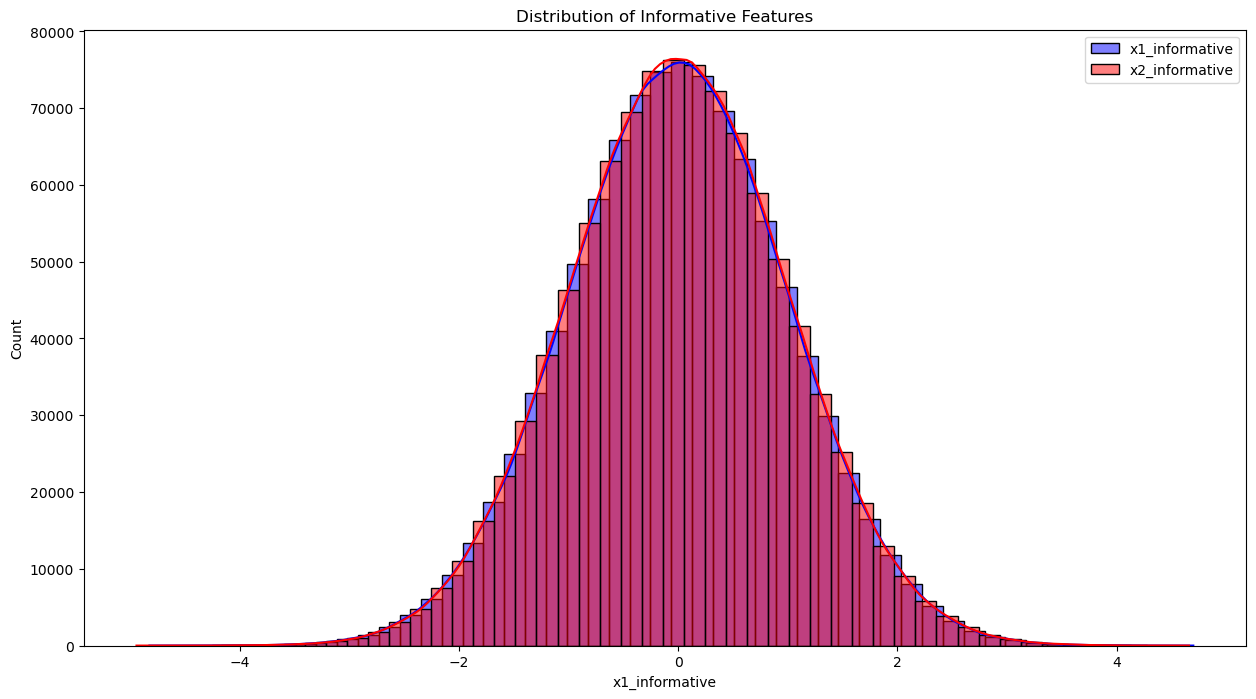


Accuracy: 0.74598
Mean Squared Error: 0.25402

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83    139231
           1       0.63      0.39      0.48     60769

    accuracy                           0.75    200000
   macro avg       0.70      0.65      0.66    200000
weighted avg       0.73      0.75      0.73    200000


Confusion Matrix:
 [[125500  13731]
 [ 37073  23696]]


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
file_path = r'D:\uplift_synthetic_data_100trials.csv'  
data = pd.read_csv(file_path)

# Анализ данных
print("First 5 rows of the data:")
print(data.head())

print("\nSummary statistics of the data:")
print(data.describe())

# Анализ признаков
features = data.drop(['trial_id', 'treatment_group_key', 'conversion'], axis=1)

# Группировка по группам клиентов
grouped_data = data.groupby('treatment_group_key').agg({'conversion': 'mean'}).reset_index()
print("\nConversion rate by treatment group:")
print(grouped_data)

# Визуализация распределения признаков
plt.figure(figsize=(15, 8))
sns.histplot(data['x1_informative'], kde=True, bins=50, color='blue', label='x1_informative')
sns.histplot(data['x2_informative'], kde=True, bins=50, color='red', label='x2_informative')
plt.title('Distribution of Informative Features')
plt.legend()
plt.show()

# Разделение выборки на обучающую и тестовую
X = data.drop(['trial_id', 'treatment_group_key', 'conversion'], axis=1)
y = data['conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy}')

# Рассчет MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Дополнительные метрики и отчет о классификации
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
